# Lab 2 - Classification

## 1. Introduction


In this lab, we explore **supervised learning** with a focus on **classification problems**, where the task is to predict discrete class labels based on input features. We will implement and analyze several widely used **classification models** including Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Support Vector Machine (SVM), and Naive Bayes. Each model will be trained on labeled data and evaluated using key **performance metrics** such as accuracy, precision, recall, F1-score, confusion matrix, ROC curve, and AUC score. Furthermore, we will apply **hyperparameter tuning** techniques to optimize the performance of our models, using methods like grid search and cross-validation. Through this lab, you will develop a deeper understanding of building classification models, interpreting their results, evaluating their effectiveness, and improving them through careful tuning and validation.


### What is Supervised Learning?

**Supervised learning** is a type of machine learning where a model is trained on a labeled dataset, meaning that for each input, the correct output is already known. The goal is for the model to learn the relationship between inputs and outputs, so it can predict the correct output for new, unseen data. 

For example, in a spam detection system, the model is trained using thousands of emails that are already labeled as "spam" or "not spam." By learning from the patterns in these labeled examples — like specific words or email structures — the model becomes able to classify new incoming emails as either spam or not spam without needing human input. 

In supervised learning, the model improves by minimizing the error between its predictions and the actual labels during training.

Extra Sources: [Google Cloud](https://cloud.google.com/discover/what-is-supervised-learning#:~:text=Supervised%20learning%20is%20a%20category,the%20input%20and%20the%20outputs.), [IBM](https://www.ibm.com/think/topics/supervised-learning)






### What is a Classification Problem in Machine Learning?

**Classification** is a type of supervised learning problem in machine learning where the goal is to assign an input to one of several predefined categories or classes.  
The model learns from a labeled dataset, where each input is already associated with the correct class, and aims to predict the correct class for new, unseen inputs.  
Classification is used when the output is **discrete** — meaning it belongs to a set of distinct groups.

### Example
- Given a photo of an animal, classify it as a **cat**, **dog**, or **rabbit**.
- Given an email, classify it as **spam** or **not spam**.

---

In simple terms, classification answers the question:

> "Which category does this input belong to?"


### Example Problem Flow

### Problem
We want to classify a flower into one of three species:
- **Setosa**
- **Versicolor**
- **Virginica**

based on its measurements.

### How it Works
- We collect a **structured dataset** with flower features and their known species.

Example structured dataset:

| Sepal Length (cm) | Sepal Width (cm) | Petal Length (cm) | Petal Width (cm) | Species      |
|-------------------|------------------|-------------------|------------------|--------------|
| 5.1               | 3.5              | 1.4               | 0.2              | Setosa       |
| 7.0               | 3.2              | 4.7               | 1.4              | Versicolor   |
| 6.3               | 3.3              | 6.0               | 2.5              | Virginica    |
| 4.9               | 3.1              | 1.5               | 0.1              | Setosa       |
| ...               | ...              | ...               | ...              | ...          |

- **Input**: Sepal Length, Sepal Width, Petal Length, Petal Width  
- **Output**: Species (Setosa, Versicolor, Virginica)

### Training
- We train a classification model (e.g., Decision Tree, Support Vector Machine) on this structured dataset.
- The model learns how the flower's measurements are related to its species.

### After Training
- When given a **new flower's measurements**, the model can **predict** which species it belongs to, even if it has never seen that particular flower before.

---

> In simple words:  
> **We teach the model with examples of flower measurements and correct species, so it can guess the species of new flowers.**



## 2. Importing Data

In [1]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# setting the random seed for reproducibility
import numpy as np
np.random.seed(42)
# disabling warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [2]:
#Uploading Data
import os
data_file_path= os.path.join('data','data.csv')
data=pd.read_csv(data_file_path)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


In [3]:
#Making Train Test Split
X=data.drop(columns="Survived")
y=data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3. Training Different Models

### Logistic Regression

**Logistic Regression** is a supervised learning algorithm used for **classification tasks**.  
Despite its name, it is actually a classification model rather than a regression model.

The main idea of logistic regression is to model the probability that a given input belongs to a particular class.  
It uses the **logistic (sigmoid) function** to map any real-valued number into a value between 0 and 1, representing probability.

The model predicts probabilities and then classifies inputs by applying a threshold (usually 0.5).  
- If the predicted probability is greater than 0.5, it classifies the input as **class 1**.
- Otherwise, it classifies the input as **class 0**.

### Mathematical Formulation

The logistic (sigmoid) function is:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where 

$$
z = w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n
$$

is a linear combination of the input features.

## When to Use Logistic Regression
- Binary classification (e.g., spam vs. not spam)


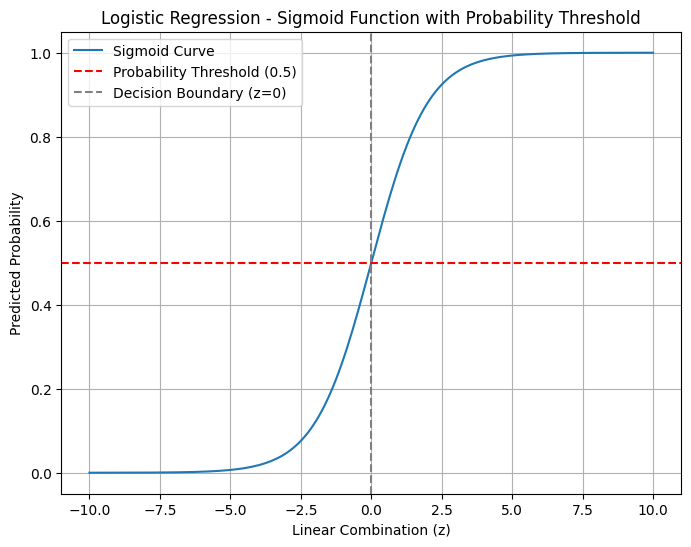

In [4]:
#Training Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
#Getting Predictions from Model
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [6]:
#Getting Probabilities of each test data (if it is higher than 0.5 it is counted as Survived)
y_proba = model.predict_proba(X_test)
y_proba[:10]

array([[0.85059007, 0.14940993],
       [0.77437988, 0.22562012],
       [0.86878579, 0.13121421],
       [0.11476009, 0.88523991],
       [0.2646876 , 0.7353124 ],
       [0.06469258, 0.93530742],
       [0.31453751, 0.68546249],
       [0.9137169 , 0.0862831 ],
       [0.25768588, 0.74231412],
       [0.0753097 , 0.9246903 ]])

In [7]:
features=list(X_train.columns)

In [8]:
importance = model.coef_[0]

In [9]:
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})

### Feature Importance 

**Feature importance** refers to techniques that assign a score to each input feature based on how useful it is at predicting the target variable. The meaning of the importance score depends on the type of model: in tree-based models (like Decision Trees or Random Forests), importance scores are always positive, between 0 and 1, and represent how much a feature helps in reducing impurity (creating better splits); in linear models (like Logistic Regression or Linear Regression), the scores are the model’s coefficients, which can be positive or negative, indicating both the direction and strength of a feature’s influence on the prediction. A **positive coefficient** means the feature increases the likelihood of predicting a higher target value (e.g., class 1), while a **negative coefficient** means the feature pushes the prediction toward a lower target value (e.g., class 0). A larger absolute value — whether positive or negative — means the feature has a stronger impact. By analyzing feature importance, we can interpret the model’s behavior, identify the most influential features, simplify models by removing weak features, and gain insights into the relationships in the data.




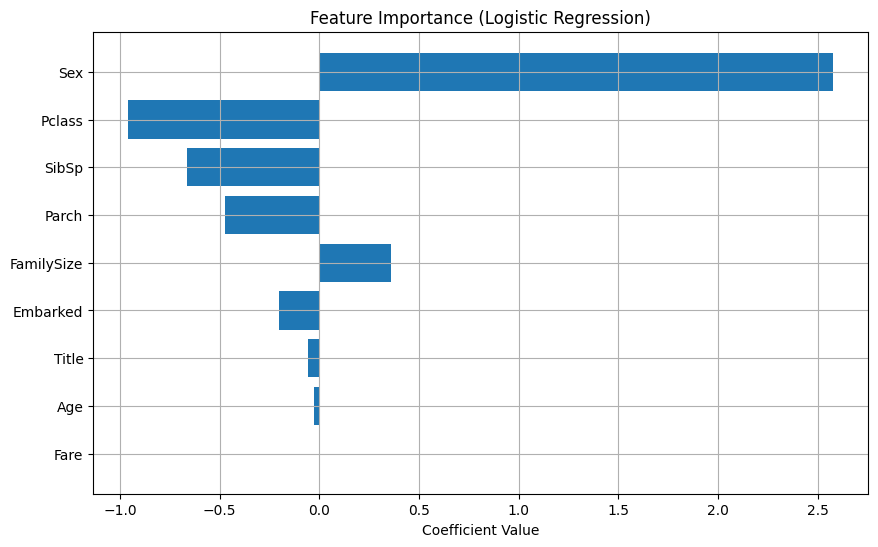

In [10]:
feature_importance['Absolute Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False)

# 6. Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


### K-Nearest Neighbors (KNN)

**K-Nearest Neighbors (KNN)** is a simple, powerful, and intuitive supervised learning algorithm used for **classification** and **regression** tasks.  
In KNN, the idea is to classify a new data point based on the labels of its **'k' nearest neighbors** in the training data.

Unlike many other algorithms, KNN **does not build an explicit model** during training. Instead, it memorizes the training dataset and makes decisions **only at prediction time**, which is why KNN is sometimes called a **lazy learning algorithm**.



### How KNN Works (for Classification)

1. **Choose the number of neighbors** \( k \) (e.g., \( k = 3 \)).
2. **Compute the distance** between the new point and all training data points.
   - Common distance metrics: **Euclidean distance**, **Manhattan distance**.
3. **Select the k closest points** (neighbors) based on the calculated distances.
4. **Assign the most common class label** among the \( k \) neighbors to the new point.



### Key Points:
- **Small \( k \)** (e.g., 1 or 3) can make the model sensitive to noise (overfitting).
- **Large \( k \)** smoothens the decision boundaries but can cause underfitting.
- KNN assumes that **similar points are close** in feature space.
- KNN can work with multiple classes (multiclass classification).



### Example Visualization

In the figure below:
- **Blue points** belong to **Class 0**.
- **Red points** belong to **Class 1**.
- A **green X** represents a **new data point** we want to classify.

To classify the green point:
- We compute its distance to all training points.
- Find the \( k \) closest ones (for example, 3 nearest neighbors).
- The most frequent class among these neighbors is assigned to the green point.

The visual intuition shows that KNN is a **proximity-based method**:  
closer points influence the prediction more strongly.




> **In simple words:**  
> KNN looks at the closest neighbors and "votes" to decide the class of a new point!


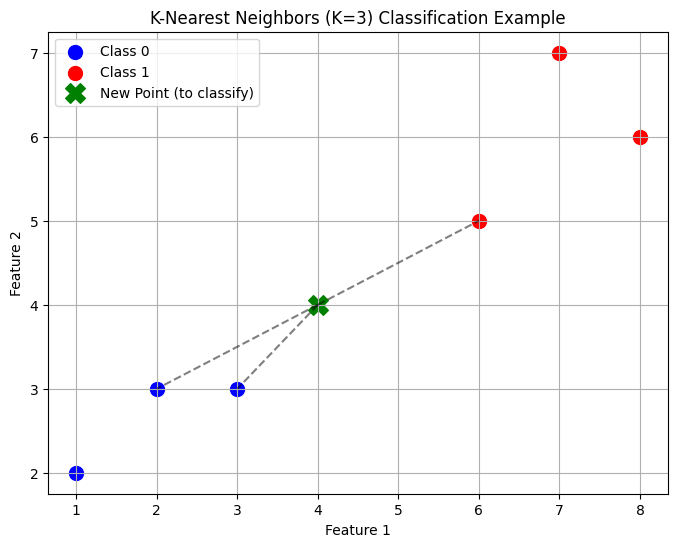

In [11]:
#Training KNN Model

knn = KNeighborsClassifier(n_neighbors=5)  # We will use 5 neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = knn.predict(X_test) # Prediction of the models
y_pred[:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

### Decision Trees

# Decision Trees

**Decision Trees** are supervised learning models used for both **classification** and **regression** tasks.  
They work by splitting the data into subsets based on feature values, following a structure that looks like a flowchart: each internal node tests a feature, each branch represents a decision outcome, and each leaf node assigns a prediction.

At each node, the algorithm chooses the feature and threshold that best splits the data according to some criterion (like **Gini impurity** or **Information Gain**).

---

## Key Points:
- Easy to interpret and visualize.
- Can handle both numerical and categorical data.
- Prone to **overfitting** if not properly controlled (e.g., limiting the depth).

---

## Example Visualization

The figure below shows a decision tree trained on the **Iris dataset**:
- Internal nodes show decisions based on flower measurements (like petal length).
- Leaves represent final predicted classes (e.g., Setosa, Versicolor, Virginica).

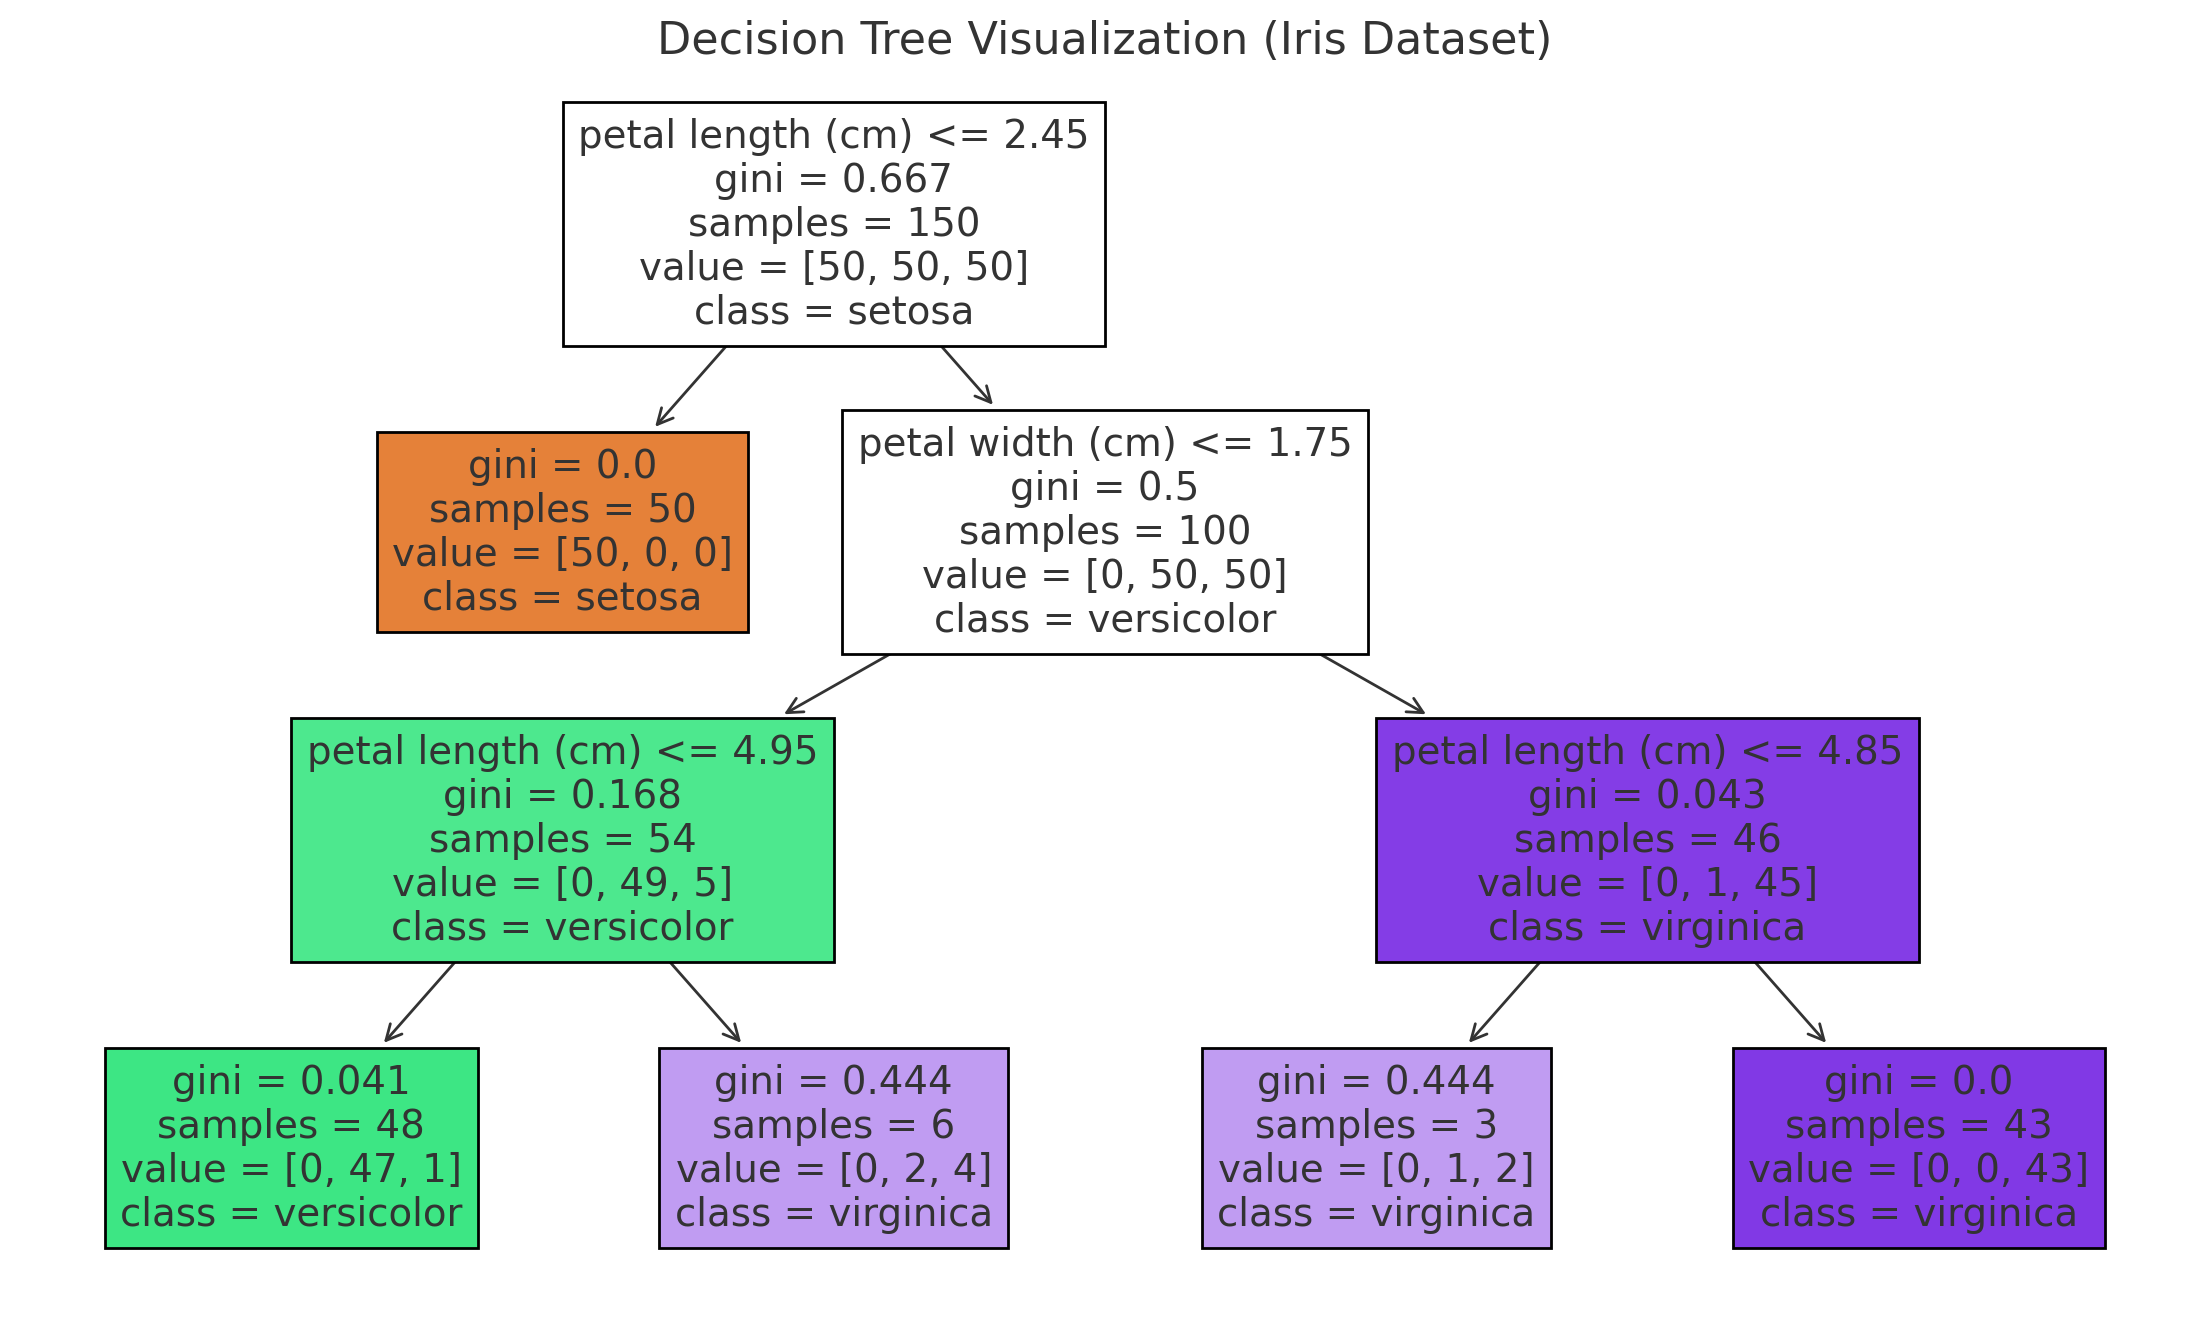


---

> **In simple words:**  
> A Decision Tree splits the dataset into smaller and smaller groups based on feature values, until it can make a decision (prediction) at the leaf.


In [13]:
#Train the Decision Tree Classifier
model = DecisionTreeClassifier(
    criterion='gini',     # or use 'entropy' for Information Gain
    max_depth=3,          # limit tree depth to avoid overfitting, it limits depth of the tree
    random_state=42
)

# 4. Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

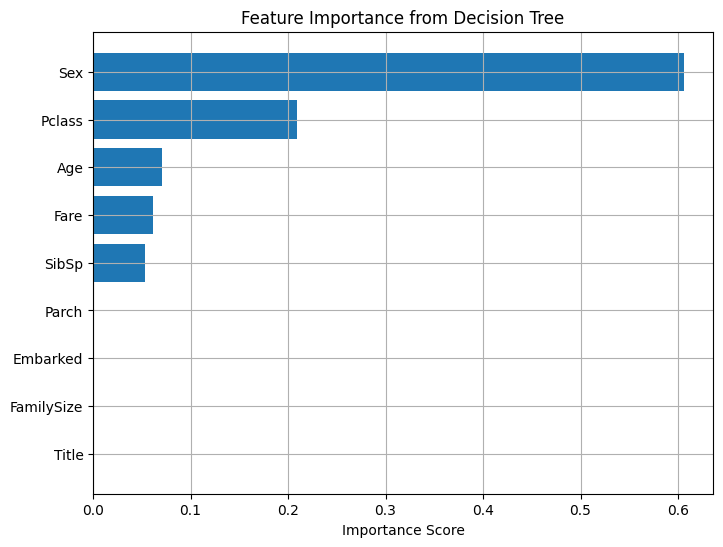

In [15]:
importances = model.feature_importances_

# 4. Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 5. Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

### Random Forests


**Random Forest** is an ensemble machine learning method that combines the outputs of many individual decision trees to create a stronger and more robust model. It works by training each tree on a random subset of the data (using bootstrap sampling) and selecting a random subset of features at each split, which helps to reduce overfitting and make the trees less correlated with each other. **It is called "Random" Forest because both the training data and the features are randomly sampled when building each tree**, introducing diversity among the trees and improving the overall generalization performance. In classification tasks, Random Forest predicts by majority voting across the trees, while in regression tasks it predicts by averaging the outputs. The use of randomness and multiple trees helps Random Forest achieve better accuracy, lower variance, and greater resistance to noisy data compared to a single decision tree. Random Forests can also measure feature importance, providing insights into which variables are most influential for the model’s predictions. Although the ensemble is less interpretable than a single tree, Random Forest is a powerful and reliable method widely used in practice.



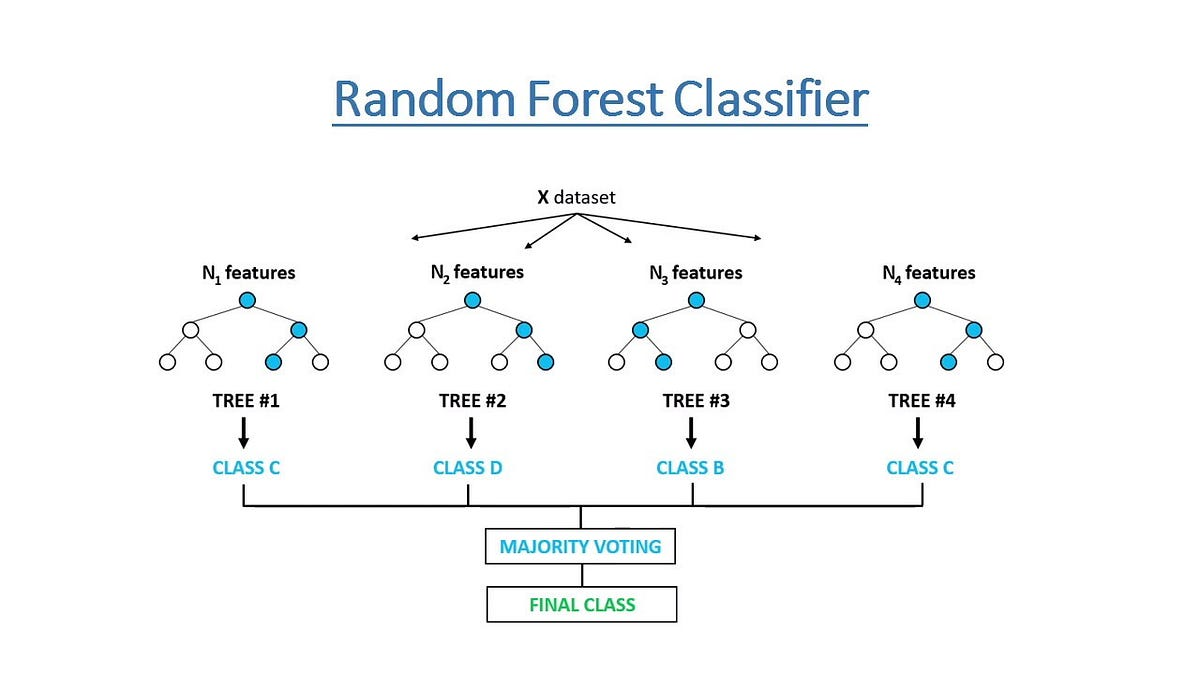


In [16]:
#Train the Random Forest Classifier
model = RandomForestClassifier(
    n_estimators=100,    # number of trees in the forest
    max_depth=None,      # trees will expand until all leaves are pure or until all leaves contain less than min_samples_split samples
    random_state=42
)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = model.predict(X_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1])

### Support Vector Machines (SVM)

**Support Vector Machines (SVM)** are powerful supervised learning algorithms used for both **classification** and **regression** tasks. In classification, the main goal of SVM is to find the **optimal hyperplane** that best separates the data into different classes. The hyperplane is chosen to maximize the **margin**, which is the distance between the hyperplane and the nearest data points from each class (called **support vectors**). A larger margin generally leads to better generalization to unseen data. SVMs can perform both linear and non-linear classification: by using a technique called the **kernel trick**, SVMs can implicitly map data into higher-dimensional spaces where a linear separator is possible even if the original data is not linearly separable. Popular kernels include linear, polynomial, and radial basis function (RBF). SVMs are particularly effective in high-dimensional spaces and are robust against overfitting, especially when the number of dimensions exceeds the number of samples.

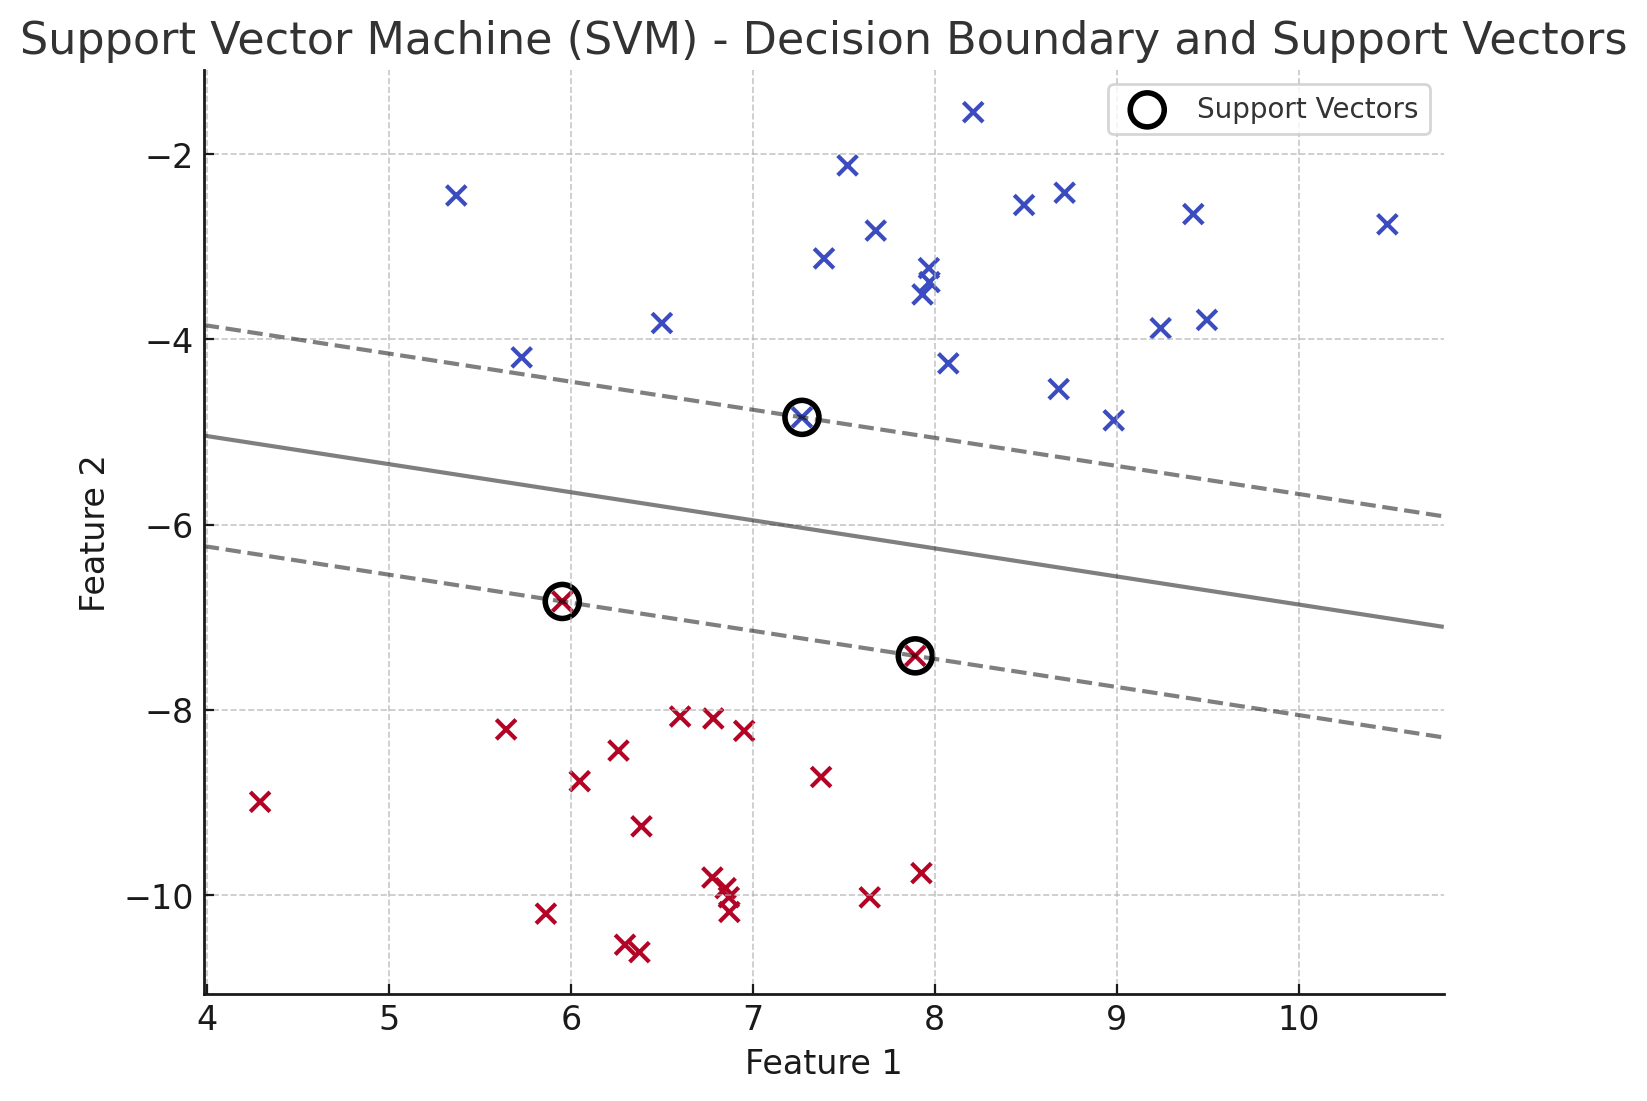

---

> **In simple words:**  
> SVM tries to find the "widest possible street" between two classes, using only the edge cases (support vectors) to define it.


In [17]:
# 3. Initialize the SVM classifier
model = SVC(
    kernel='linear',    # Kernel type: 'linear', 'poly', 'rbf', or 'sigmoid'
    C=1.0,              # Regularization parameter (larger C = less regularization)
    random_state=42
)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

**Regularization** in SVM (and machine learning in general) helps control model complexity by adding a penalty for being too complex, making the model more general and less prone to overfitting.



### Naive Bayes

**Naive Bayes** is a family of simple and powerful supervised learning algorithms based on applying **Bayes' Theorem** with a strong assumption that features are **independent** given the class label (this is the "naive" part). Despite this strong and often unrealistic assumption, Naive Bayes classifiers perform surprisingly well in many practical applications, especially when working with high-dimensional data like text classification problems.

Bayes' Theorem describes the probability of a class given the observed features:

$$
P(\text{Class} \mid \text{Features}) = \frac{P(\text{Features} \mid \text{Class}) \times P(\text{Class})}{P(\text{Features})}
$$

In Naive Bayes, because features are assumed to be independent, the joint probability is computed as:

$$
P(\text{Features} \mid \text{Class}) = P(\text{Feature}_1 \mid \text{Class}) \times P(\text{Feature}_2 \mid \text{Class}) \times \cdots \times P(\text{Feature}_n \mid \text{Class})
$$

The model predicts the class with the highest posterior probability.

There are different types of Naive Bayes classifiers based on the nature of the feature distributions, such as:
- **Gaussian Naive Bayes**: assumes features follow a normal (Gaussian) distribution.
- **Multinomial Naive Bayes**: used for discrete counts (e.g., text data - word counts).
- **Bernoulli Naive Bayes**: used for binary/boolean features.

---

> **In simple words:**  
> Naive Bayes uses probability rules to guess the most likely class, assuming each feature contributes independently to the result.


In [18]:
model = GaussianNB()
# 4. Train the model
model.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = model.predict(X_test)
y_pred[:10]

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

# Model Evaluation

The model evalution process in this lab are mainly divided into three sections, where each of them are breifly explained below:

1. **Confusion Matrix**: A table that summarizes the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions.

2. **Accuracy, Precision, Recall, F1-Score** : 
    - **Accuracy**: The proportion of correct predictions out of all predictions made.
    - **Precision**: The proportion of true positive predictions out of all positive predictions made (true positives / (true positives + false positives)).
    - **Recall**: The proportion of true positive predictions out of all actual positive instances (true positives / (true positives + false negatives)).
    - **F1-Score**: The harmonic mean of precision and recall, providing a balance between the two.

3. **ROC Curve and AUC**: 
    - **ROC Curve**: A graphical representation of the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings.
    - **AUC (Area Under the Curve)**: A single scalar value that summarizes the performance of the model across all thresholds. AUC values range from 0 to 1, with higher values indicating better model performance.



In [19]:
# Choosing the Logistic Regression Model as the candidate model for evaluation 
# Add feature scaling before training
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training Logistic Regression Model
model = LogisticRegression(random_state=42)
# 4. Train the model
model.fit(X_train_scaled, y_train)
#Getting Predictions from Model
y_pred = model.predict(X_test_scaled)

# 1. Confusion Matrix

Before diving into individual metrics, it's essential to understand the confusion matrix, which provides a comprehensive view of the model's performance. The confusion matrix is a fundamental tool in classification tasks, allowing us to visualize the performance of our model in a structured way and familiarize with the key terms used in classification evaluation.\\

A confusion matrix is a table that is used to evaluate the performance of a classification model. It presents a summary of the predictions made by the model compared to the actual values. The matrix has four key components:

* **True Positives (TP)**: The model correctly predicted the positive class.
* **True Negatives (TN)**: The model correctly predicted the negative class.
* **False Positives (FP)**: The model incorrectly predicted the positive class (Type I error).
* **False Negatives (FN)**: The model incorrectly predicted the negative class (Type II error).

The confusion matrix helps us understand:
- Where our model is getting confused
- The types of errors our model is making
- Whether certain classes are being misclassified more often than others

## Confusion Matrix Layout
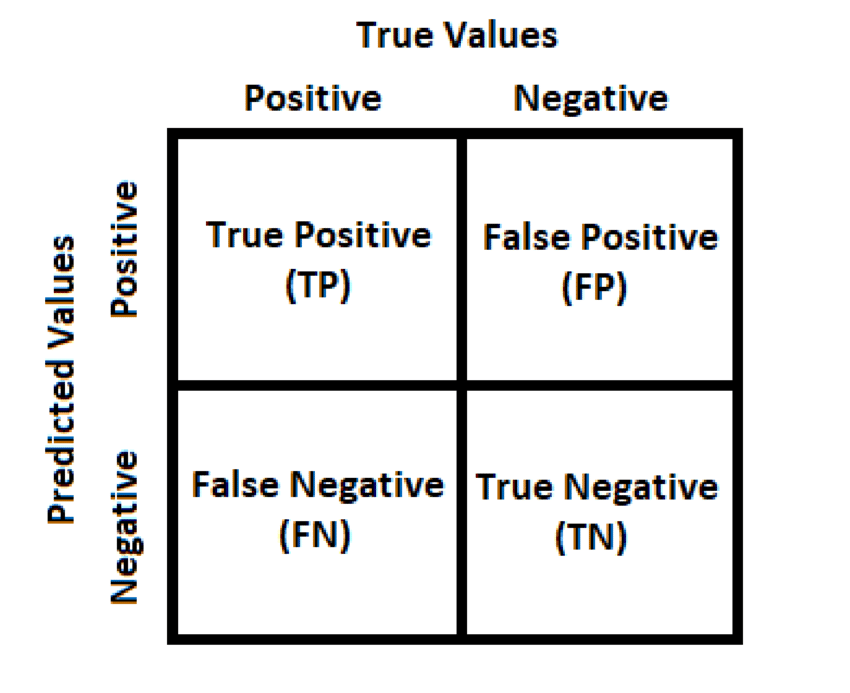


Confusion Matrix:
[[90 15]
 [19 55]]


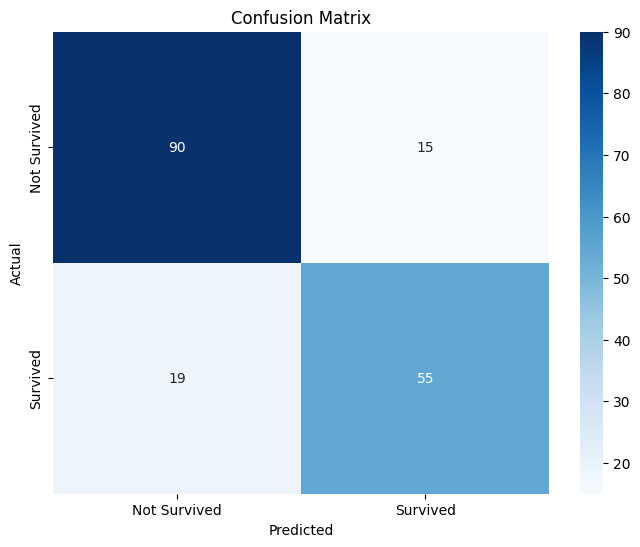

In [20]:
# 1. Importing
from sklearn.metrics import confusion_matrix
import seaborn as sns
# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The visualization of this matrix helps to clearly see where the model is performing well and where it needs improvement. And as you can see, the diagonal elements (TP and TN) represent correct predictions, while the off-diagonal elements (FP and FN) represent incorrect predictions. 

## 2. Accuracy, Precision, Recall, F1-Score

### Accuracy 
Accuracy is the simplest and most intuitive metric for evaluating classification models. It measures the proportion of correct predictions made by the model out of all predictions. 
It is calculated as:
$$
\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Predictions}}
$$

### Precision
Precision is a measure of the accuracy of positive predictions. It indicates how many of the predicted positive instances were actually positive.
It is calculated as:
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$
For example, in a spam detection system, precision tells us how many of the emails classified as spam were actually spam. 
A high precision indicates that the model has a low false positive rate, meaning it makes fewer mistakes in classifying negative instances as positive.
### Recall
Recall, also known as sensitivity or true positive rate, measures the model's ability to identify all relevant instances. It indicates how many of the actual positive instances were correctly predicted by the model.
It is calculated as:
$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$
For example, in a spam detection system, recall tells us how many of the actual spam emails were correctly classified as spam.
A high recall indicates that the model has a low false negative rate, meaning it misses fewer positive instances.
### F1-Score
The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall, making it useful when dealing with imbalanced datasets where one class is more prevalent than the other.
It is calculated as:
$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$
The F1-score ranges from 0 to 1, with 1 being the best possible score. It is particularly useful when the cost of false positives and false negatives is not equal, as it provides a more comprehensive evaluation of the model's performance.

In [21]:
# Importing the evaluation Metrics functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [22]:
# 2.Accuracy ,Precision, Recall, F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


# Classification Report (combines all metrics)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1-Score: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# 3. ROC Curve and AUC

ROC (Receiver Operating Characteristic) Curve and AUC (Area Under the Curve) are important evaluation metrics for classification models, particularly when dealing with binary classification problems.

## ROC Curve

The ROC curve is a graphical representation that shows the performance of a classification model at all classification thresholds. It plots:

* **True Positive Rate (Sensitivity)** on the y-axis: The proportion of actual positives correctly identified.
* **False Positive Rate (1-Specificity)** on the x-axis: The proportion of actual negatives incorrectly classified as positive.

The ROC curve illustrates the trade-off between sensitivity and specificity. By adjusting the classification threshold, we can increase one at the expense of the other.

## AUC (Area Under the Curve)

AUC provides a single scalar value that measures the overall performance of a binary classifier across all possible classification thresholds. AUC ranges from 0 to 1, where:

* **AUC = 1.0**: Perfect classifier
* **AUC = 0.5**: No better than random guessing (diagonal line on ROC plot)
* **AUC < 0.5**: Worse than random guessing

The higher the AUC, the better the model's ability to distinguish between positive and negative classes.

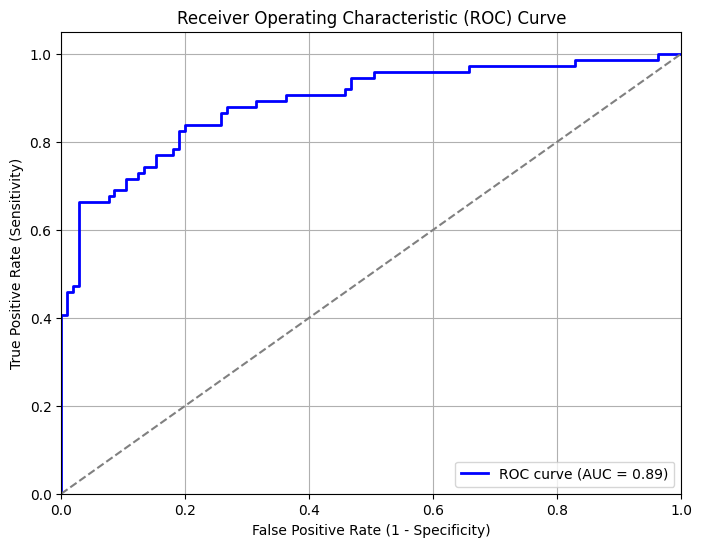

In [23]:
# 3. ROC Curve and AUC Score
# For binary classification, we need probability estimates
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Model Tuning

Model tuning is the process of optimizing the performance of a machine learning model by adjusting its hyperparameters. Hyperparameters are parameters that are not learned from the data but are set before the learning process begins.

## Hyperparameter Tuning

Hyperparameters control the behavior of the learning algorithm, and finding the optimal values can significantly improve model performance. Common methods for hyperparameter tuning include:

### Grid Search

Grid Search exhaustively searches through a predefined set of hyperparameter values. It trains a model for each combination of hyperparameters and selects the combination that produces the best performance.

In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Solver algorithms
    'max_iter': [100, 200, 300]  # Maximum iterations
}

# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [38]:
# Print best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("Test Accuracy of Tuned Model:", accuracy_score(y_test, y_pred))


Best Parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'saga'}
Best Cross-Validation Score: 0.7991234117994681
Test Accuracy of Tuned Model: 0.8044692737430168


## Class Imbalance

Class imbalance occurs when one class significantly outnumbers the other in a dataset, which can lead to biased models that favor the majority class. There are several strategies to address class imbalance:

### 1. Class Weights

Assigning higher weights to the minority class during training to make it "more important".

In [24]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print("\nClass Weights:", class_weight_dict)

# Apply class weights to the model
weighted_model = LogisticRegression(class_weight=class_weight_dict, random_state=42)
weighted_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_weighted = weighted_model.predict(X_test_scaled)
print("Test Accuracy of Weighted Model:", accuracy_score(y_test, y_pred_weighted))


Class Weights: {np.int64(0): np.float64(0.8018018018018018), np.int64(1): np.float64(1.328358208955224)}
Test Accuracy of Weighted Model: 0.8156424581005587


### 2. Resampling Techniques

#### a. Oversampling (SMOTE)

SMOTE (Synthetic Minority Over-sampling Technique) creates new, synthetic examples of the minority class to balance the dataset. Unlike random duplication which would create exact copies, SMOTE generates new samples by interpolating between existing minority class examples.

### How SMOTE Works:

1. For each minority class example:
    - Find its k-nearest neighbors (other minority class examples)
    - Select one of these neighbors randomly
    - Create a new example along the line connecting these two points

### For Example:
Imagine we have a dataset with:
- 100 examples of Class 0 (majority)
- Only 20 examples of Class 1 (minority)

SMOTE would:
- Select each minority example
- Create synthetic examples between it and its neighbors
- Generate 80 new synthetic minority examples
- Result: 100 examples of each class (balanced)

### Benefits of SMOTE:
- Creates realistic synthetic samples rather than exact duplicates
- Improves classifier performance by preventing bias toward the majority class
- Addresses the fundamental issue of class imbalance rather than just adjusting model parameters

### Visual Intuition:
![SMOTE illustration](./metadata/SMOTE.png)

- 📝 You can find the SMOTE original paper at [here](https://arxiv.org/pdf/1106.1813).

In [29]:
from imblearn.over_sampling import SMOTE

# SMOTE for handling imbalanced data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("\nOriginal Class Distribution:")
print(pd.Series(y_train).value_counts())
# Check new class distribution
print("\nClass Distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Train model on resampled data
resampled_model = LogisticRegression(random_state=42)
resampled_model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_resampled = resampled_model.predict(X_test_scaled)
print("Test Accuracy of Resampled Model:", accuracy_score(y_test, y_pred_resampled))


Original Class Distribution:
Survived
0    444
1    268
Name: count, dtype: int64

Class Distribution after SMOTE:
Survived
0    444
1    444
Name: count, dtype: int64
Test Accuracy of Resampled Model: 0.8212290502793296


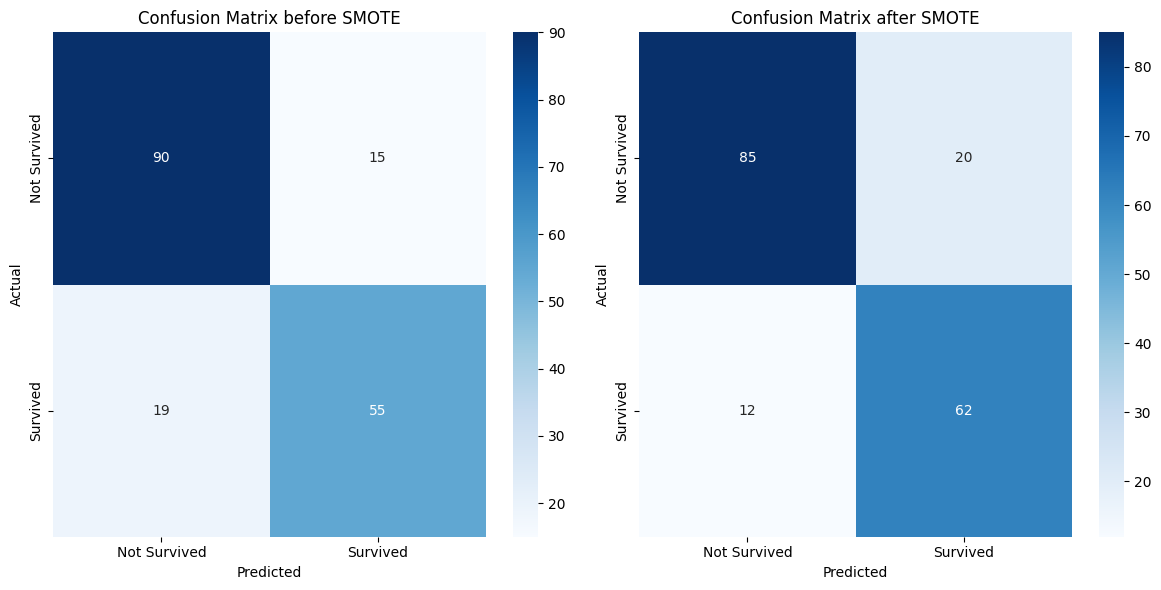

In [27]:
# Comapring the Confusions matrix before and after SMOTE
cm_before = confusion_matrix(y_test, y_pred)
cm_after = confusion_matrix(y_test, y_pred_resampled)

# Visualize the confusion matrix before SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'], ax=ax[0])
ax[0].set_title('Confusion Matrix before SMOTE')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
# Visualize the confusion matrix after SMOTE
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'], ax=ax[1])
ax[1].set_title('Confusion Matrix after SMOTE')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

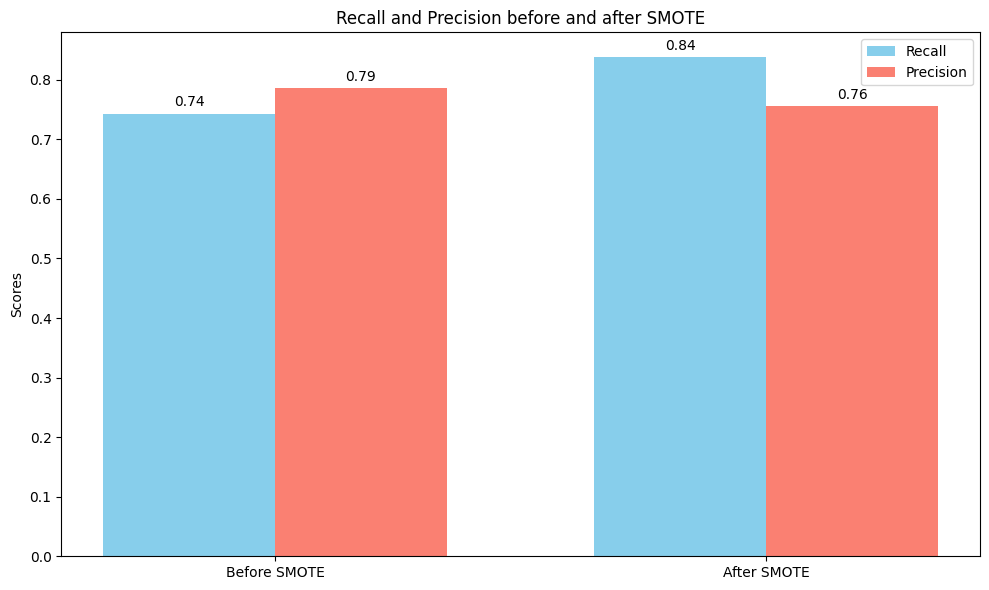

In [ ]:
# Data for plotting
labels = ['Before SMOTE', 'After SMOTE']
recall_scores = [recall_score(y_test, y_pred), recall_score(y_test, y_pred_resampled)]
precision_scores = [precision_score(y_test, y_pred), precision_score(y_test, y_pred_resampled)]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
# Create bar plots
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, recall_scores, width, label='Recall', color='skyblue')
rects2 = ax.bar(x + width/2, precision_scores, width, label='Precision', color='salmon')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Recall and Precision before and after SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
# Function to add value labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
add_value_labels(rects1)
add_value_labels(rects2)
plt.tight_layout()
plt.show()

#### Interpretation of SMOTE
> SMOTE slightly sacrifices precision to significantly boost recall, helping the model better recognize the minority class (Survived). This is beneficial when missing true positives is more costly than having a few extra false positives—especially in imbalanced classification problems.

#### b. Undersampling

Reducing the number of instances from the majority class to match the minority class. Unlike what we have done previously, in this method, we try to remove some of the majority class instances to balance the dataset. However, there is famous saying that "The more data, the better", so we should be careful when using this method, as it may lead to loss of important information. 

## Overfitting and Underfitting

![overfitting vs underfitting](./metadata/underfitting_vs_overfitting.png)

Overfitting and underfitting are common problems in machine learning that affect model performance:

### Overfitting

Overfitting occurs when a model learns the training data too well, including its noise and fluctuations, causing poor performance on unseen data. Signs of overfitting include:

- High training accuracy but low test accuracy
- Large gap between training and validation performance
- Complex model with many parameters

### Underfitting

Underfitting occurs when a model is too simple to capture the underlying pattern in the data. Signs of underfitting include:

- Low accuracy on both training and test data
- Small gap between training and validation performance
- Too simple model with few parameters

### Detecting Overfitting and Underfitting with Learning Curves

Learning curves show model performance as a function of training set size for both training and validation sets.

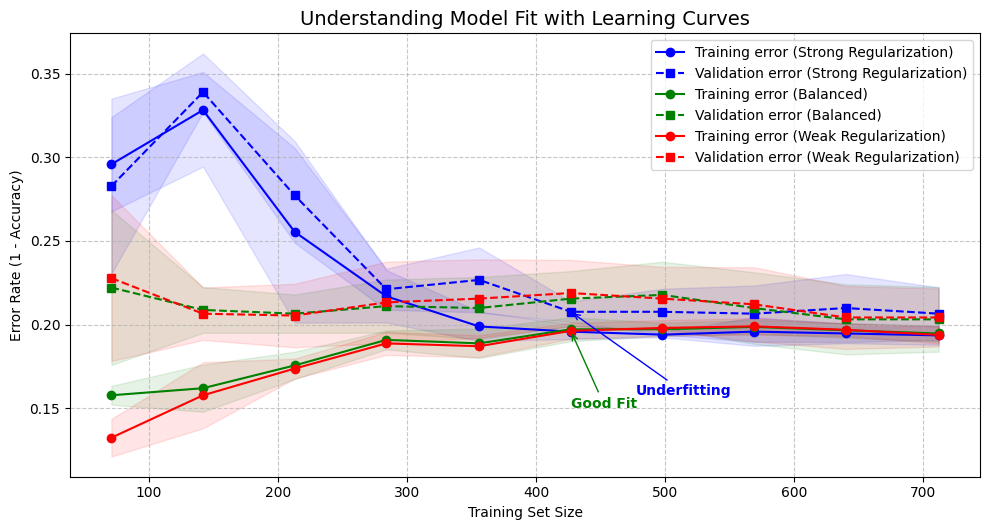

In [38]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

def plot_learning_curves(X, y, title="Model Learning Behavior"):
    """
    Plot learning curves for different regularization strengths to clearly
    show underfitting and overfitting behavior.
    """
    # Three regularization strengths to demonstrate different behaviors
    regularization_strengths = [0.01, 1.0, 1000.0]
    behaviors = ["Strong Regularization", "Balanced", "Weak Regularization"]
    colors = ['blue', 'green', 'red']
    
    plt.figure(figsize=(10, 6))
    
    for C, behavior, color in zip(regularization_strengths, behaviors, colors):
        # Create pipeline with scaling and logistic regression
        model = make_pipeline(
            StandardScaler(),
            LogisticRegression(C=C, max_iter=2000, random_state=42)
        )
        
        # Calculate learning curves
        train_sizes, train_scores, valid_scores = learning_curve(
            model, X, y, 
            train_sizes=np.linspace(0.1, 1.0, 10),
            cv=5, scoring='accuracy', n_jobs=-1, random_state=42
        )
        
        # Calculate means and standard deviations
        train_mean = train_scores.mean(axis=1)
        train_std = train_scores.std(axis=1)
        valid_mean = valid_scores.mean(axis=1)
        valid_std = valid_scores.std(axis=1)
        
        # Plot error rates (1 - accuracy) instead of accuracy
        train_error = 1 - train_mean
        valid_error = 1 - valid_mean
        
        # Plot the curves
        plt.plot(train_sizes, train_error, 'o-', color=color, 
                 label=f'Training error ({behavior})')
        plt.plot(train_sizes, valid_error, 's--', color=color, 
                 label=f'Validation error ({behavior})')
        
        # Add shaded regions for standard deviation
        plt.fill_between(train_sizes, 
                         train_error - train_std, 
                         train_error + train_std, 
                         alpha=0.1, color=color)
        plt.fill_between(train_sizes, 
                         valid_error - valid_std, 
                         valid_error + valid_std, 
                         alpha=0.1, color=color)
        
        # Annotate underfitting and overfitting based on behavior
        if C == 0.01:  # Strong regularization typically causes underfitting
            mid_idx = len(train_sizes) // 2
            plt.annotate('Underfitting', 
                        xy=(train_sizes[mid_idx], valid_error[mid_idx]),
                        xytext=(train_sizes[mid_idx] + 50, valid_error[mid_idx] - 0.05),
                        arrowprops=dict(arrowstyle='->', color=color),
                        color=color, fontweight='bold')
        
        elif C == 1000.0:  # Weak regularization can lead to overfitting
            last_idx = -1
            gap = valid_error[last_idx] - train_error[last_idx]
            if gap > 0.05:  # If there's a significant gap
                plt.annotate('Overfitting', 
                            xy=(train_sizes[last_idx], (train_error[last_idx] + valid_error[last_idx])/2),
                            xytext=(train_sizes[last_idx] - 100, (train_error[last_idx] + valid_error[last_idx])/2 - 0.05),
                            arrowprops=dict(arrowstyle='->', color=color),
                            color=color, fontweight='bold')
    
    # Add a visual indicator for "good fit" in the balanced model
    mid_idx = len(train_sizes) // 2
    plt.annotate('Good Fit', 
                xy=(train_sizes[mid_idx], 1 - train_scores.mean(axis=1)[mid_idx]),
                xytext=(train_sizes[mid_idx], 0.15),
                arrowprops=dict(arrowstyle='->', color='green'),
                color='green', fontweight='bold')
    
    # Set plot attributes
    plt.xlabel('Training Set Size')
    plt.ylabel('Error Rate (1 - Accuracy)')
    plt.title(title, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='upper right')
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    return plt

# Usage:
plot_learning_curves(X, y, "Understanding Model Fit with Learning Curves").show()

### Model Complexity vs. Performance

Comparing models with different complexity levels can help identify the optimal model complexity.

In [43]:
# Compare models with different complexity (Decision Tree with different depths)
depths = [1, 3, 5, 10, 20, None]  # None means unlimited depth
train_scores = []
test_scores = []

for depth in depths:
    depth_name = str(depth) if depth is not None else "None (unlimited)"
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train_scaled, y_train)
    
    # Score on training and test sets
    train_score = dt.score(X_train_scaled, y_train)
    test_score = dt.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print(f"Max Depth: {depth_name}")
    print(f"  Training Score: {train_score:.4f}")
    print(f"  Test Score: {test_score:.4f}")
    print(f"  Gap: {train_score - test_score:.4f}")
    print()

Max Depth: 1
  Training Score: 0.7879
  Test Score: 0.7821
  Gap: 0.0058

Max Depth: 3
  Training Score: 0.8343
  Test Score: 0.5866
  Gap: 0.2477

Max Depth: 5
  Training Score: 0.8469
  Test Score: 0.5866
  Gap: 0.2603

Max Depth: 10
  Training Score: 0.9228
  Test Score: 0.5866
  Gap: 0.3362

Max Depth: 20
  Training Score: 0.9747
  Test Score: 0.5866
  Gap: 0.3881

Max Depth: None (unlimited)
  Training Score: 0.9831
  Test Score: 0.5866
  Gap: 0.3966



## Cross-Validation

Cross-validation is a technique to evaluate model performance by partitioning the original data into training and testing sets multiple times. It provides a more robust assessment of model performance than a single train-test split.

### K-Fold Cross-Validation

In k-fold cross-validation, the data is divided into k subsets (or folds). The model is trained k times, each time using a different fold as the test set and the remaining folds as the training set.

In [44]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the results
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Scores: [0.7877095  0.79775281 0.78089888 0.78651685 0.83146067]
Mean CV Score: 0.7968677421379701
Standard Deviation: 0.01812993821666153


### Benefits of Cross-Validation

1. Makes better use of the available data
2. Provides a more reliable estimate of model performance
3. Helps detect overfitting
4. Reduces the variance of the performance estimate

### Stratified K-Fold

For imbalanced datasets, stratified k-fold ensures that each fold maintains the same proportion of class labels as the original dataset.

In [45]:
from sklearn.model_selection import StratifiedKFold

# Initialize the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store scores
cv_scores = []

# Perform stratified k-fold cross-validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Train and evaluate model
    model = LogisticRegression(random_state=42)
    model.fit(X_train_fold, y_train_fold)
    score = model.score(X_test_fold, y_test_fold)
    cv_scores.append(score)

print("Stratified K-Fold Cross-Validation Scores:", cv_scores)
print("Mean:", sum(cv_scores) / len(cv_scores))

Stratified K-Fold Cross-Validation Scores: [0.7877094972067039, 0.7921348314606742, 0.7808988764044944, 0.797752808988764, 0.8089887640449438]
Mean: 0.793496955621116



## Summary

Model evaluation and tuning are crucial steps in the machine learning workflow. By properly evaluating models using metrics like accuracy, precision, recall, F1-score, ROC curves, and AUC, we can understand their strengths and limitations. Techniques like hyperparameter tuning, addressing class imbalance, and cross-validation help optimize models and ensure they generalize well to unseen data. By understanding the concepts of overfitting and underfitting, we can build models that strike the right balance between complexity and performance.